# Logistic Regression

## Machine Learning Excercise 2

### Install Packages

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import os
import scipy.optimize as opt
from scipy.optimize import minimize

### Data Exploration

In [2]:
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
x = data.as_matrix(columns = ['Exam 1','Exam 2'])
y = data.as_matrix(columns = ['Admitted'])


### Visualize the Data

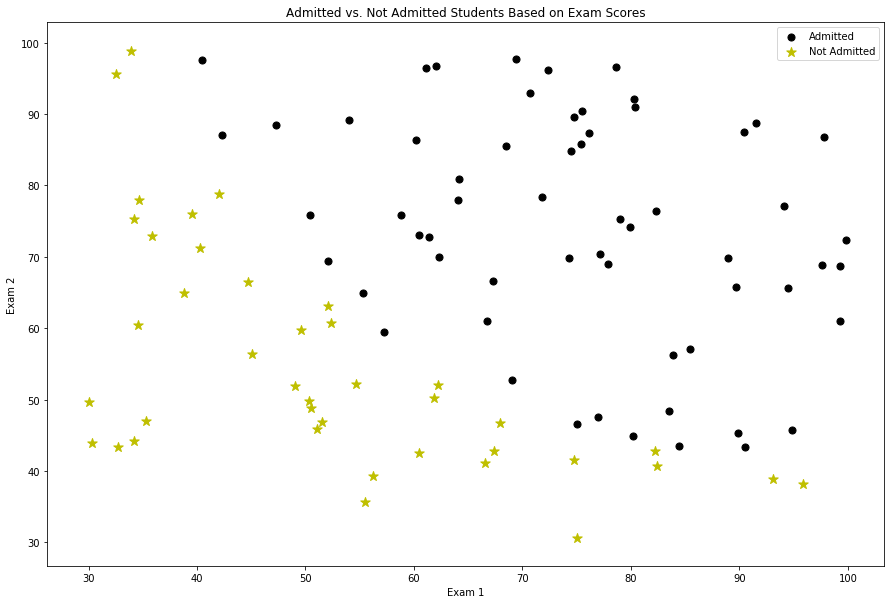

In [6]:
def plotData() :
    admitted = data[data['Admitted'].isin([1])]
    not_admitted = data[data['Admitted'].isin([0])]

    fig, axes = plt.subplots(figsize=(15,10))

    axes.scatter(admitted['Exam 1'], admitted['Exam 2'], s=50, c='black', marker='o', label='Admitted')
    axes.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], s=100, c='y', marker='*', label='Not Admitted')

    axes.set_title('Admitted vs. Not Admitted Students Based on Exam Scores')
    axes.legend()                    
    axes.set_xlabel('Exam 1')
    axes.set_ylabel('Exam 2')

plotData()

### Sigmoid Function
The logistical regression hypothesis is defined as:
![img](img/hypothesis.png)

where function *g* is the sigmoid function. The sigmoid function is defined as:
![img](img/sigmoid.png)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Text(0.5,1,'sigmoid function')

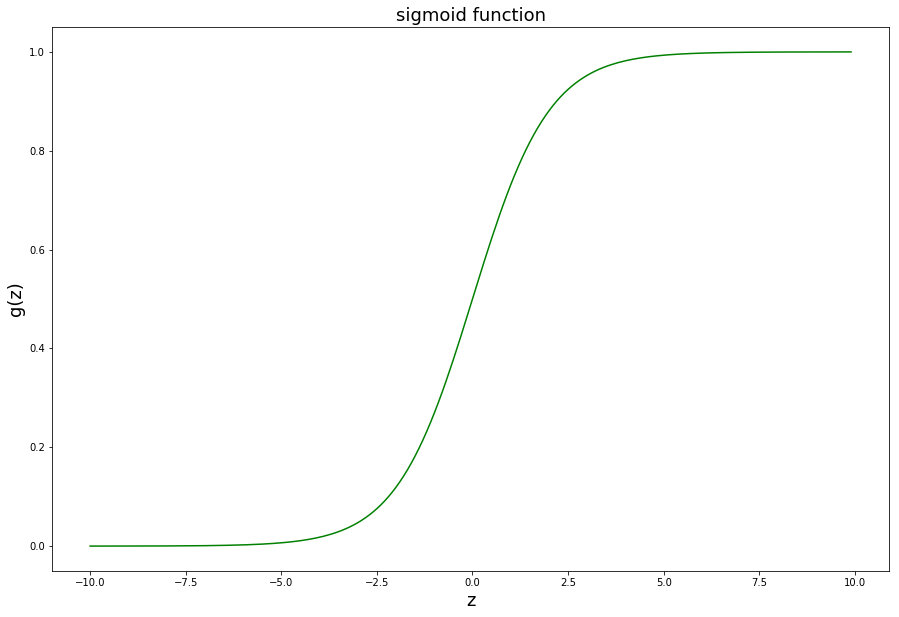

In [8]:
nums = np.arange(-10, 10, step=0.1)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nums, sigmoid(nums), 'green')
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

## Cost Function
![img](img/cost.png)

In [9]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second) / len(X)
    
    

In [10]:
data.insert(0,'Ones',1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [11]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.zeros(3)

In [13]:
cost(theta,X,y)

0.6931471805599453

## Gradient Descent
![img](img/gradientDescent.png)

In [14]:
def gradientDescent(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term) / len(x)
        
    return grad

In [15]:
gradientDescent(theta,X,y)


array([ -0.1       , -12.00921659, -11.26284221])

In [16]:
res = minimize(cost,theta,args=(X,y),method=None,jac=gradientDescent,options={'maxiter':400})
print(res)

      fun: 0.20349770158944383
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476824e-09, -9.31921321e-07, -2.82608930e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])


/Users/anhthyngo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/anhthyngo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


In [17]:
theta_min = res.x
theta_min

array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [18]:
cost(theta_min,X,y)

0.20349770158944383

## Prediction

In [19]:
def pred(theta,X):
    return sigmoid(np.dot(X,theta.T))


pred(theta_min,np.array([1,45,85]))

0.776290724058894

In [20]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    result = []
    for i in probability:
        if i >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

In [21]:
theta_min = np.matrix(res.x)
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('The accuracy of this model is {0}%'.format(accuracy))

The accuracy of this model is 89%


# Decision Boundary

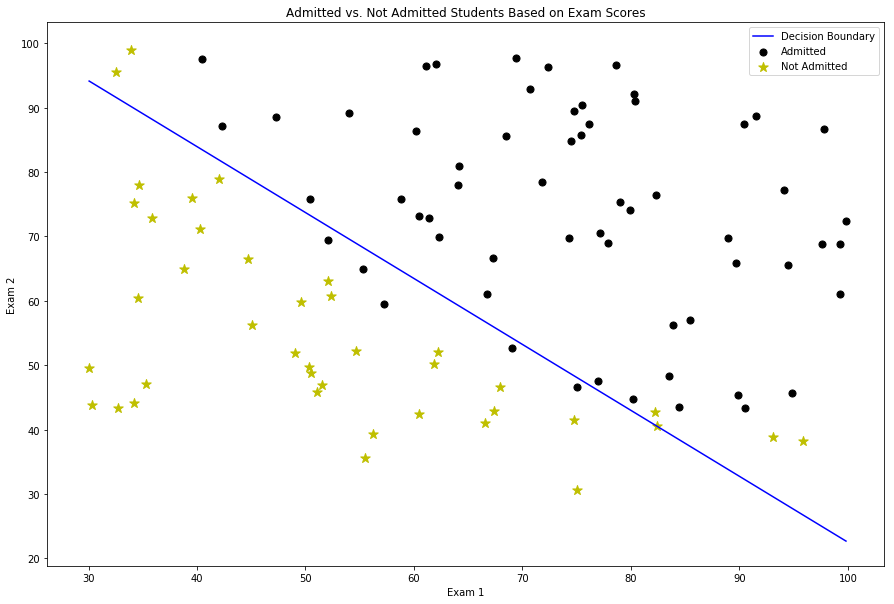

In [22]:
boundary_x = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_y = (-1./theta_min[0,2])*(theta_min[0,0] + theta_min[0,1]*boundary_x)
plotData()
plt.plot(boundary_x, boundary_y, c='b', label='Decision Boundary')
plt.legend()
